In [1]:
import mxnet as mx
import numpy as np
from mxnet import nd, autograd, gluon
mx.random.seed(1)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\ProgramData\Anaconda3\lib\site-packages\h5py\tests\old\test_attrs_data.py:251: DeprecationWarning: invalid escape sequence \H
  s = b"Hello\x00\Hello"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\func_inspect.py:53: DeprecationWarning: invalid escape sequence \<
  '\<doctest (.*\.rst)\[(.*)\]\>', source_file).groups()
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\_memory_helpers.py:10: DeprecationWarning: invalid escape sequence \s
  cookie_re = re.compile("coding[:=]\s*([-\w.]+)")


In [2]:
data_ctx=mx.gpu()
model_ctx=mx.gpu()
ctx=mx.gpu()

In [16]:
batch_size = 128
#num_inputs = 784
num_outputs = 10
num_examples = 60000
def transform(data, label):
    return nd.transpose(data.astype(np.float32), (2,0,1))/255, label.astype(np.float32)
train_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.datasets.CIFAR10(train=True, transform=transform),
                                      batch_size, shuffle=True)
test_data = mx.gluon.data.DataLoader(mx.gluon.data.vision.datasets.CIFAR10(train=False, transform=transform),
                                     batch_size, shuffle=False)

C:\ProgramData\Anaconda3\lib\site-packages\mxnet\gluon\data\vision\datasets.py:163: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(fin.read(), dtype=np.uint8).reshape(-1, 3072+1)


In [28]:
train_data

(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 32)
(128, 3, 32, 3

(128, 3, 32, 32)


ValueError: num must be 1 <= num <= 3, not 4

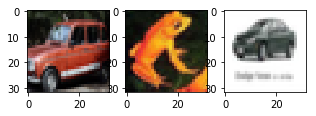

In [33]:
from matplotlib import pyplot as plt
for i, (data,label) in enumerate(train_data):
    print(data.shape)
    break

data = data[0:10]
fig=plt.figure(0,figsize=(5,5))

for i in range(10):
    plt.subplot(1, 3, i+1)
    plt.imshow((data[i]*255).asnumpy().astype(np.uint8).transpose((1,2,0)))
    
plt.show()

In [84]:
num_fc = 256
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Conv2D(channels=20, kernel_size=3, activation='relu'))
    net.add(gluon.nn.MaxPool2D(pool_size=2, strides=2))
    net.add(gluon.nn.Conv2D(channels=50, kernel_size=3, activation='relu'))
    net.add(gluon.nn.MaxPool2D(pool_size=2, strides=2))
    # The Flatten layer collapses all axis, except the first one, into one axis.
    net.add(gluon.nn.Flatten())
    net.add(gluon.nn.Dense(num_fc, activation="relu"))
    net.add(gluon.nn.Dense(num_outputs))
net.collect_params().initialize(mx.init.Xavier(magnitude=2.24),ctx=ctx)
softmax_cross_entropy=gluon.loss.SoftmaxCrossEntropyLoss()
trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':.1})

In [19]:
net=gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Conv2D(channels=32,kernel_size=3,padding=1))
    net.add(gluon.nn.BatchNorm(axis=1))
    net.add(gluon.nn.Activation(activation='relu'))
    net.add(gluon.nn.Dropout(0.2))
    net.add(gluon.nn.Conv2D(channels=32,kernel_size=3,padding=1))
    net.add(gluon.nn.BatchNorm(axis=1))
    net.add(gluon.nn.Activation(activation='relu'))
    net.add(gluon.nn.MaxPool2D(pool_size=2))
    net.add(gluon.nn.Dropout(0.5))
    
    net.add(gluon.nn.Conv2D(channels=64,kernel_size=3,padding=1))
    net.add(gluon.nn.BatchNorm(axis=1))
    net.add(gluon.nn.Activation(activation='relu'))
    net.add(gluon.nn.Dropout(0.2))
    net.add(gluon.nn.Conv2D(channels=64,kernel_size=3,padding=1))
    net.add(gluon.nn.BatchNorm(axis=1))
    net.add(gluon.nn.Activation(activation='relu'))
    net.add(gluon.nn.MaxPool2D(pool_size=2))
    net.add(gluon.nn.Dropout(0.5))
    
    net.add(gluon.nn.Flatten())
    net.add(gluon.nn.Dense(256))
    net.add(gluon.nn.BatchNorm(axis=1))
    net.add(gluon.nn.Activation(activation='relu'))
    net.add(gluon.nn.Dropout(0.5))
    
    net.add(gluon.nn.Dense(256))
    net.add(gluon.nn.BatchNorm(axis=1))
    net.add(gluon.nn.Activation(activation='relu'))
    net.add(gluon.nn.Dropout(0.5))
    
    net.add(gluon.nn.Dense(10))
    
net.collect_params().initialize(mx.init.Xavier(),ctx=ctx)
softmax_cross_entropy=gluon.loss.SoftmaxCrossEntropyLoss()
trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':.1})

In [20]:
def evaluate_accuracy(data_iterator,net):
    acc=mx.metric.Accuracy()
    for i, (data,label) in enumerate(train_data):
        data=data.as_in_context(ctx)
        label=label.as_in_context(ctx)
        output=net(data)
        predictions=nd.argmax(output,axis=1)
        #print(predictions)
        #print(label)
        acc.update(preds=predictions,labels=label)
    return acc.get()[1]

In [21]:
epochs = 10
smoothing_constant = .01

for e in range(epochs):
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        trainer.step(data.shape[0])

        ##########################
        #  Keep a moving average of the losses
        ##########################
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (curr_loss if ((i == 0) and (e == 0))
                       else (1 - smoothing_constant) * moving_loss + smoothing_constant * curr_loss)

    test_accuracy = evaluate_accuracy(test_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" % (e, moving_loss, train_accuracy, test_accuracy))

Epoch 0. Loss: 1.7663742196219363, Train_acc 0.18486, Test_acc 0.18486
Epoch 1. Loss: 1.5375662934844412, Train_acc 0.44806, Test_acc 0.44806
Epoch 2. Loss: 1.4318173583748424, Train_acc 0.36692, Test_acc 0.36692
Epoch 3. Loss: 1.3689022685702925, Train_acc 0.51238, Test_acc 0.51238
Epoch 4. Loss: 1.315261309125416, Train_acc 0.5677, Test_acc 0.5677
Epoch 5. Loss: 1.2508979809907501, Train_acc 0.45942, Test_acc 0.45942
Epoch 6. Loss: 1.1981963217134468, Train_acc 0.47288, Test_acc 0.47288
Epoch 7. Loss: 1.1500558435849701, Train_acc 0.61628, Test_acc 0.61628
Epoch 8. Loss: 1.111489035832787, Train_acc 0.63324, Test_acc 0.63324
Epoch 9. Loss: 1.06734478504495, Train_acc 0.66902, Test_acc 0.66902
